In [1]:
import numpy as np
import matplotlib.pyplot as plt
import thinkplot
import scipy.signal
import ipywidgets as widgets

from thinkdsp import decorate, SquareSignal, Wave, zero_pad
from ipywidgets import interact, interactive, fixed

In [2]:
np.set_printoptions(precision=3, suppress=True)

In [11]:
def plot_filter(M=11, std=2):
    signal = SquareSignal(freq=440)
    wave = signal.make_wave(duration=1, framerate=44100)
    spectrum = wave.make_spectrum()

    gaussian = scipy.signal.gaussian(M=M, std=std)
    gaussian /= sum(gaussian)
    high = gaussian.max()
    thinkplot.preplot(cols=2)
    thinkplot.plot(gaussian)
    thinkplot.config(xlabel='Index', ylabel='Window',
    xlim=[0, len(gaussian)-1], ylim=[0, 1.1*high])

    ys = np.convolve(wave.ys, gaussian, mode='same')
    smooth =  Wave(ys, framerate=wave.framerate)
    spectrum2 = smooth.make_spectrum()
    
    amps = spectrum.amps
    amps2 = spectrum2.amps
    ratio = amps2 / amps    
    ratio[amps<560] = 0

    padded =  zero_pad(gaussian, len(wave))
    dft_gaussian = np.fft.rfft(padded)

    thinkplot.subplot(2)
    thinkplot.plot(abs(dft_gaussian), color='0.7', label='Gaussian filter')
    thinkplot.plot(ratio, label='amplitude ratio')
    thinkplot.show(xlabel='Frequency (Hz)', ylabel='Amplitude ratio')

In [13]:
slider = widgets.IntSlider(min=2, max=100, value=11)
slider2 = widgets.FloatSlider(min=0, max=20, value=15)
interact(plot_filter, M=11, std=slider2);

interactive(children=(IntSlider(value=11, description='M', max=33, min=-11), FloatSlider(value=15.0, descripti…

In [5]:
def plot_gaussian(std):
    gaussian = scipy.signal.gaussian(M=32, std=std)
    gaussian /= sum(gaussian)
    
    thinkplot.preplot(num=2, cols=2)
    thinkplot.plot(gaussian)
    thinkplot.config(xlabel='Time', legend=False)

    fft_gaussian = np.fft.fft(gaussian)
    fft_rolled = np.roll(fft_gaussian, 32//2)
    
    thinkplot.subplot(2)
    thinkplot.plot(abs(fft_rolled))
    thinkplot.config(xlabel='Frequency')

In [17]:
slider = widgets.FloatSlider(min=0.1, max=10, value=5)
interact(plot_gaussian, std=slider);

interactive(children=(FloatSlider(value=5.0, description='std', max=10.0, min=0.1), Output()), _dom_classes=('…

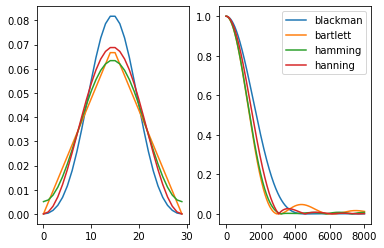

In [7]:
def plot_window(ax, window_fun, M=30):
    signal = SquareSignal(freq=440)
    wave = signal.make_wave(duration=1.0, framerate=44100)
    
    window = window_fun(M)
    window /= sum(window)
    
    padded = zero_pad(window, len(wave))
    fft = np.fft.rfft(padded)
    
    ax[0].plot(window, label=window_fun.__name__)
    ax[1].plot(abs(fft)[:8000], label=window_fun.__name__)
    plt.legend()
    
_, ax = plt.subplots(1, 2)
for w in [np.blackman, np.bartlett, np.hamming, np.hanning]:
    plot_window(ax, w)